Sinh viên 1: Nguyễn Mậu Trọng Hiếu - 20120081

Sinh viên 2: Nhan Gia Khâm - 20120504

Sinh viên 3: Nguyễn Bảo Tín - 20120596

Lớp 20TN

# NHẬP MÔN PHÂN TÍCH ĐỘ PHỨC TẠP THUẬT TOÁN
# BÁO CÁO GIỮA KỲ


In [1]:
# import libraries
import os
import shutil
import random
import time
import math
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
from utils import *

In [3]:
# try to import libraaries for cryptography
try:
    import crypto
    import sys
    
    sys.modules['Crypto'] = crypto
except:
    pass

In [4]:
# generated test will be stored in this folder
route_test = "generated_test"

try:
    shutil.rmtree(route_test)
except:
    pass

try:
    os.mkdir(route_test)
except:
    pass

SEED = 42
random.seed(SEED)

In [5]:
# trick to count number of comparisons
def inc(x):
    x[0] = x[0] + 1
    return True


def measure_time(func, *args):
    start = time.time()
    results = func(*args)
    end = time.time()
    return end - start, results


def plot_run_times(run_times, steps, name='run_times.png'):
    fig = plt.figure(figsize=(10, 5))
    x = steps
    for algorithm, run_time in run_times.items():
        plt.plot(x, run_time, label=algorithm)
    plt.xlabel('Input Size (Number of Digits)')
    plt.ylabel('Run Time (Seconds)')
    plt.legend()
    plt.show()
    fig.savefig(name, dpi=100)
    plt.close(fig)


def plot_comparisons(comparisons, steps, name='comparisons.jpg'):
    fig = plt.figure(figsize=(10, 5))
    x = steps
    for algorithm, comparison in comparisons.items():
        plt.plot(x, comparison, label=algorithm)
    plt.xlabel('Input Size (Number of Digits)')
    plt.ylabel('Number of Comparisons')
    plt.legend()
    plt.show()
    fig.savefig(name, dpi=100)
    plt.close(fig)

In [6]:
from sympy import randprime
from sympy.ntheory import isprime
from random import randint
from Crypto.Random.random import randint
from Crypto.Util.number import getPrime
from math import log2

def generate_random_number(n_digits):
    lower = 10 ** (n_digits - 1)
    upper = (10 ** n_digits) - 1
    return randint(lower, upper + 1)

# generate a random prime number that has n_digits
def generate_random_large_prime(n_digit):
    lower = 10 ** (n_digit - 1)
    upper = (10 ** n_digit) - 1
    number = getPrime(int(log2(upper)))
    while number < lower:
        number = getPrime(int(log2(upper)))
        
    # number = randprime(lower, upper)
    return number

## Phần kiểm tra về tốc độ chạy giữa các thuật toán Naive


{'naive_1': 0, 'naive_2': 0}


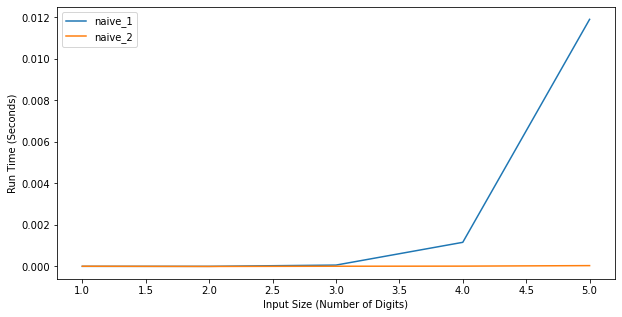

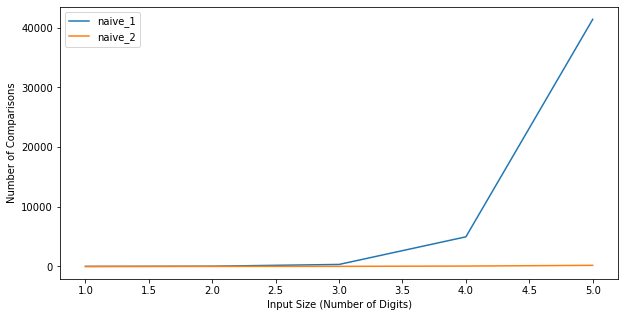

In [7]:
list_of_algo = [naive_1, naive_2]
run_times = {}
comparisons_count = {}
wrong_freqency = {}
# init dictionary
for func in list_of_algo:
    run_times[func.__name__] = {}
    comparisons_count[func.__name__] = {}

n_digts = range(1, 6, 1)
n_repeat = 200
for n_digt in n_digts:
    save_path = os.path.join(route_test, f'test_case_{n_digt}_digit.txt')
    # open the file and close it, similar to touch command
    open(save_path, 'a').close()
    for repeat in range(n_repeat):
        with open(save_path, 'a') as f:
            number = generate_random_number(n_digt) if not randint(0, 5) else generate_random_large_prime(n_digt)
            
            # number = generate_random_number(n_digt)
            f.write('Input: ' + str(number) + '\n')
            check_ans = []
            for func in list_of_algo:
                run_time, results = measure_time(func, number)
                results, comparisons = results
                func_name = func.__name__
                try:
                    run_times[func_name][repeat].append(run_time)
                    comparisons_count[func_name][repeat].append(
                        comparisons)
                except:
                    run_times[func_name][repeat] = [run_time]
                    comparisons_count[func_name][repeat] = [comparisons]
                    
                verdict = 1 if results != isprime(number) else 0

                try:
                    wrong_freqency[func_name] += verdict 
                except:
                    wrong_freqency[func_name] = verdict
                    

avg_run_times = {}
avg_comparisons_count = {}
print(wrong_freqency)

for func in list_of_algo:
    calculate_run_time = []
    calculate_comparisons_count = []
    for repeat in range(n_repeat):
        calculate_run_time.append(run_times[func.__name__][repeat])
        calculate_comparisons_count.append(
            comparisons_count[func.__name__][repeat])
    avg_run_times[func.__name__] = np.mean(calculate_run_time, axis=0)
    avg_comparisons_count[func.__name__] = np.mean(
        calculate_comparisons_count, axis=0)

plot_run_times(avg_run_times, n_digts, name='naive_1_2_run_times.jpg')
plot_comparisons(avg_comparisons_count, n_digts, name='naive_1_2_comparisons.jpg')

## Phần kiểm tra về tốc độ chạy giữa các thuật toán

{'naive_2': 0, 'fermat_little': 1, 'miller_rabin': 0, 'Baillie_PSW_Test': 0}


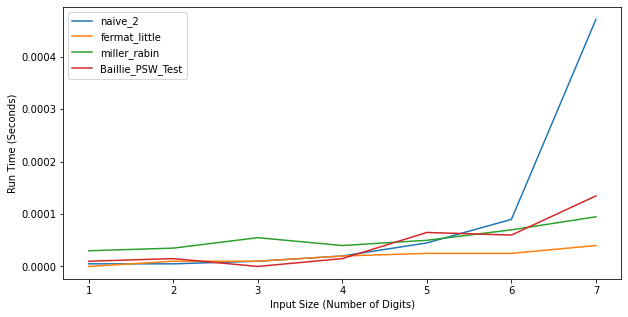

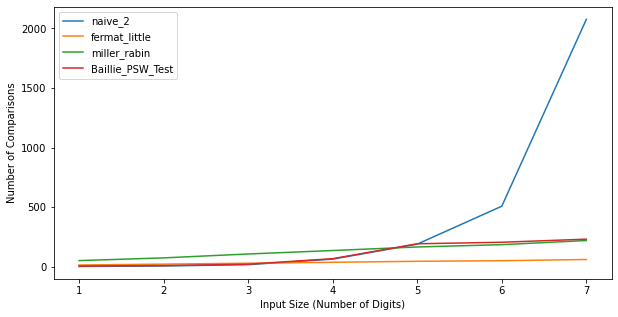

In [8]:
list_of_algo = [naive_2, fermat_little, miller_rabin, Baillie_PSW_Test]
run_times = {}
comparisons_count = {}
wrong_freqency = {}
# init dictionary
for func in list_of_algo:
    run_times[func.__name__] = {}
    comparisons_count[func.__name__] = {}

n_digts = range(1, 8, 1)
n_repeat = 200
for n_digt in n_digts:
    save_path = os.path.join(route_test, f'test_case_{n_digt}_digit.txt')
    # open the file and close it, similar to touch command
    open(save_path, 'a').close()
    for repeat in range(n_repeat):
        with open(save_path, 'a') as f:
            number = generate_random_number(n_digt) if not randint(0, 5) else generate_random_large_prime(n_digt)
            
            # number = generate_random_number(n_digt)
            f.write('Input: ' + str(number) + '\n')
            check_ans = []
            for func in list_of_algo:
                run_time, results = measure_time(func, number)
                results, comparisons = results
                func_name = func.__name__
                try:
                    run_times[func_name][repeat].append(run_time)
                    comparisons_count[func_name][repeat].append(
                        comparisons)
                except:
                    run_times[func_name][repeat] = [run_time]
                    comparisons_count[func_name][repeat] = [comparisons]
                    
                verdict = 1 if results != isprime(number) else 0

                try:
                    wrong_freqency[func_name] += verdict 
                except:
                    wrong_freqency[func_name] = verdict
                    

avg_run_times = {}
avg_comparisons_count = {}
print(wrong_freqency)

for func in list_of_algo:
    calculate_run_time = []
    calculate_comparisons_count = []
    for repeat in range(n_repeat):
        calculate_run_time.append(run_times[func.__name__][repeat])
        calculate_comparisons_count.append(
            comparisons_count[func.__name__][repeat])
    avg_run_times[func.__name__] = np.mean(calculate_run_time, axis=0)
    avg_comparisons_count[func.__name__] = np.mean(
        calculate_comparisons_count, axis=0)

plot_run_times(avg_run_times, n_digts, name='all_run_times.jpg')
plot_comparisons(avg_comparisons_count, n_digts, name='all_comparisons.jpg')

## Phần kiểm tra về tốc độ chạy giữa các thuật toán chạy nhanh (Loại bỏ các thuật Naive)


{'fermat_little': 0, 'miller_rabin': 0, 'Baillie_PSW_Test': 0}


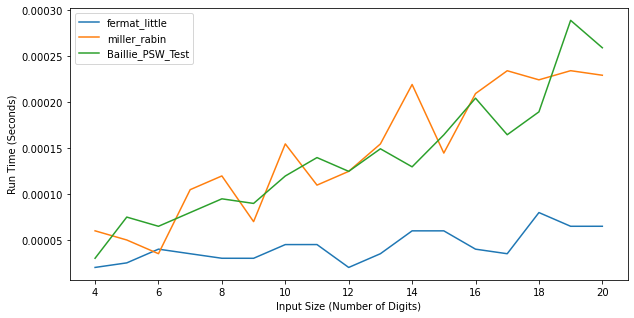

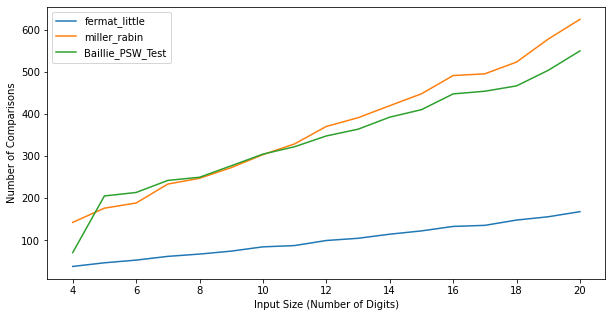

In [9]:
list_of_algo = [fermat_little, miller_rabin, Baillie_PSW_Test]
run_times = {}
comparisons_count = {}
wrong_freqency = {}
# init dictionary
for func in list_of_algo:
    run_times[func.__name__] = {}
    comparisons_count[func.__name__] = {}

n_digts = range(4, 21, 1)
n_repeat = 200
for n_digt in n_digts:
    save_path = os.path.join(route_test, f'test_case_{n_digt}_digit.txt')
    # open the file and close it, similar to touch command
    open(save_path, 'a').close()
    for repeat in range(n_repeat):
        with open(save_path, 'a') as f:
            number = generate_random_number(n_digt) if not randint(0, 5) else generate_random_large_prime(n_digt)
            
            # number = generate_random_number(n_digt)
            f.write('Input: ' + str(number) + '\n')
            check_ans = []
            for func in list_of_algo:
                run_time, results = measure_time(func, number)
                results, comparisons = results
                func_name = func.__name__
                try:
                    run_times[func_name][repeat].append(run_time)
                    comparisons_count[func_name][repeat].append(
                        comparisons)
                except:
                    run_times[func_name][repeat] = [run_time]
                    comparisons_count[func_name][repeat] = [comparisons]
                    
                verdict = 1 if results != isprime(number) else 0

                try:
                    wrong_freqency[func_name] += verdict 
                except:
                    wrong_freqency[func_name] = verdict
                    

avg_run_times = {}
avg_comparisons_count = {}
print(wrong_freqency)

for func in list_of_algo:
    calculate_run_time = []
    calculate_comparisons_count = []
    for repeat in range(n_repeat):
        calculate_run_time.append(run_times[func.__name__][repeat])
        calculate_comparisons_count.append(
            comparisons_count[func.__name__][repeat])
    avg_run_times[func.__name__] = np.mean(calculate_run_time, axis=0)
    avg_comparisons_count[func.__name__] = np.mean(
        calculate_comparisons_count, axis=0)

plot_run_times(avg_run_times, n_digts, name='fast_run_times.jpg')
plot_comparisons(avg_comparisons_count, n_digts, name='fast_comparisons.jpg')

## Phần kiểm tra tốc độ chạy của thuật toán Miller Rabin với tham số đầu vào khác nhau


{'fermat_little_None': 0, 'miller_rabin_1': 0, 'miller_rabin_2': 0, 'miller_rabin_5': 0, 'miller_rabin_10': 0, 'miller_rabin_20': 0}


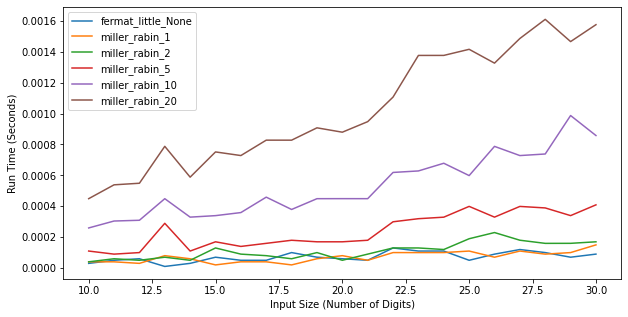

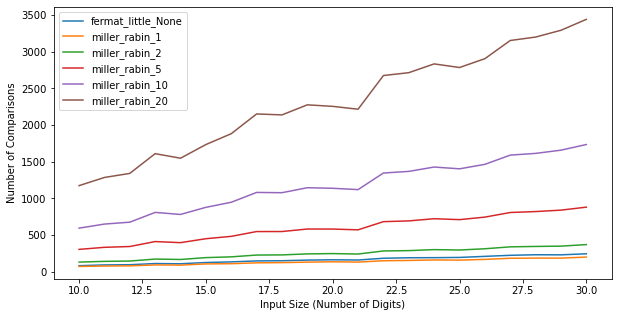

In [10]:
list_of_algo = [fermat_little, miller_rabin, miller_rabin, miller_rabin, miller_rabin, miller_rabin]
k_list       = [None, 1, 2, 5, 10, 20]
run_times = {}
comparisons_count = {}

wrong_freqency = {}
# init dictionary
for func, k_number in zip(list_of_algo, k_list):
    func_name = func.__name__ + '_' + str(k_number)

    run_times[func_name] = {}
    comparisons_count[func_name] = {}

n_digts = range(10, 31, 1) 
n_repeat = 100
for n_digt in n_digts:
    save_path = os.path.join(route_test, f'test_case_{n_digt}_digit_Miller_Rabin.txt')
    open(save_path, 'a').close()
    for repeat in range(n_repeat):
        with open(save_path, 'a') as f:
            number = generate_random_number(n_digt) if not randint(0, 5) else generate_random_large_prime(n_digt)
            # number = generate_random_number(n_digt)
            f.write('Input: ' + str(number) + '\n')
            check_ans = []
            for func, k_number in zip(list_of_algo, k_list):
                if func.__name__ == 'miller_rabin':
                    run_time, results = measure_time(func, number, k_number)
                else:
                    run_time, results = measure_time(func, number)
                    
                # print(results)
                results, comparisons = results
                func_name = func.__name__ + '_' + str(k_number)
                try:
                    run_times[func_name][repeat].append(run_time)
                    comparisons_count[func_name][repeat].append(comparisons)
                except:
                    run_times[func_name][repeat] = [run_time]
                    comparisons_count[func_name][repeat] = [comparisons]
                
                verdict = 1 if results != isprime(number) else 0

                try:
                    wrong_freqency[func_name] += verdict 
                except:
                    wrong_freqency[func_name] = verdict
                    
            
            # Kiểm tra đáp án của các thuật toán có giống nhau không
            # assert check_ans.count(check_ans[0]) == len(check_ans), 'Các thuật toán không trả về đáp án giống nhau'            

avg_run_times = {}
avg_comparisons_count = {}

print(wrong_freqency)
for func, k_number in zip(list_of_algo, k_list):
    func_name = func.__name__+ '_' + str(k_number)
    calculate_run_time = []
    calculate_comparisons_count = []
    for repeat in range(n_repeat):
        calculate_run_time.append(run_times[func_name][repeat])
        calculate_comparisons_count.append(comparisons_count[func_name][repeat])
    avg_run_times[func_name] = np.mean(calculate_run_time, axis=0)
    avg_comparisons_count[func_name] = np.mean(calculate_comparisons_count, axis=0)

plot_run_times(avg_run_times, n_digts, name='miller_rabin_run_times.jpg')
plot_comparisons(avg_comparisons_count, n_digts, name='miller_rabin_comparisons.jpg')


## Phần kiểm tra về độ chính xác của các thuật toán Monte Carlo


In [11]:
list_of_algo = [fermat_little, miller_rabin, Baillie_PSW_Test]
run_times = {}
comparisons_count = {}

# init dictionary
for func in list_of_algo:
    run_times[func.__name__] = {}
    comparisons_count[func.__name__] = {}

n_digts = range(1, 10, 1) 
n_repeat = 3000

with open('test_accuracy.txt', 'w') as facc:
    for n_digt in n_digts:
        for repeat in range(n_repeat):
            save_path = os.path.join(route_test, f'test_case_{n_digt}_digit_{repeat}_repeat.txt')
            with open(save_path, 'w') as f:
                generating_prime = False
                if not randint(0, 3):
                    generating_prime = True
                number = generate_random_number(n_digt) if not generating_prime else generate_random_large_prime(n_digt)
                f.write('Input: ' + str(number) + '\n')

                check_ans = []
                for func in list_of_algo:
                    run_time, results = measure_time(func, number)
                    results, comparisons = results
                    # print(func.__name__, ':', run_time, 's')
                    try:
                        run_times[func.__name__][repeat].append(run_time)
                        comparisons_count[func.__name__][repeat].append(comparisons)
                    except:
                        run_times[func.__name__][repeat] = [run_time]
                        comparisons_count[func.__name__][repeat] = [comparisons]
                    check_ans.append(results)
                
                # Kiểm tra đáp án của các thuật toán có giống nhau không
                if check_ans.count(check_ans[0]) != len(check_ans):
                    # print('Input: ', number)
                    # print('generating_prime:', generating_prime)

                    for func, ans in zip(list_of_algo, check_ans):
                        print(func.__name__, ':', ans)

                    facc.write('Input: ' + str(number) + '\n')
                    facc.write('generating_prime: ' + str(generating_prime) + '\n')
                    for func, ans in zip(list_of_algo, check_ans):
                        facc.write(func.__name__ + ': ' + str(ans) + '\n')
                else:
                    if generating_prime:
                        print('Input: ', number)
                        print('generating_prime:', generating_prime)
                        for func, ans in zip(list_of_algo, check_ans):
                            print(func.__name__, ':', ans)

                # assert check_ans.count(check_ans[0]) == len(check_ans), 'Các thuật toán không trả về đáp án giống nhau'            

Input:  7
generating_prime: True
fermat_little : True
miller_rabin : True
Baillie_PSW_Test : True
Input:  7
generating_prime: True
fermat_little : True
miller_rabin : True
Baillie_PSW_Test : True
Input:  5
generating_prime: True
fermat_little : True
miller_rabin : True
Baillie_PSW_Test : True
Input:  7
generating_prime: True
fermat_little : True
miller_rabin : True
Baillie_PSW_Test : True
Input:  7
generating_prime: True
fermat_little : True
miller_rabin : True
Baillie_PSW_Test : True
Input:  5
generating_prime: True
fermat_little : True
miller_rabin : True
Baillie_PSW_Test : True
Input:  5
generating_prime: True
fermat_little : True
miller_rabin : True
Baillie_PSW_Test : True
Input:  5
generating_prime: True
fermat_little : True
miller_rabin : True
Baillie_PSW_Test : True
Input:  5
generating_prime: True
fermat_little : True
miller_rabin : True
Baillie_PSW_Test : True
Input:  5
generating_prime: True
fermat_little : True
miller_rabin : True
Baillie_PSW_Test : True
Input:  7
generating